In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import re

/tmp/ipython-input-2968075342.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cpu['Frequency Range'].iloc[2:] = cpu['Frequency Range'].iloc[2:].apply(lambda x: float(re.search(r'\d+(?:\.\d+)?', x).group()))
/tmp/ipython-input-2968075342.

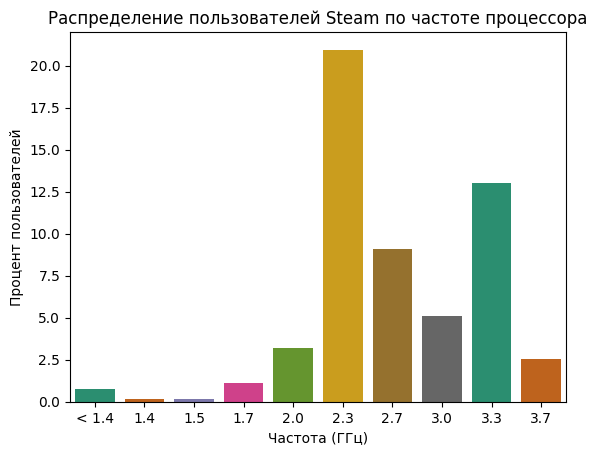

In [51]:
cpu = pd.read_csv('intelcpuspeeds_data.csv')
cpu['Percentage'] = cpu['Percentage'].apply(lambda x: x.replace('%','')).astype(float)
cpu['Frequency Range'].iloc[2:] = cpu['Frequency Range'].iloc[2:].apply(lambda x: float(re.search(r'\d+(?:\.\d+)?', x).group()))
cpu.at[1, 'Frequency Range'] = '< 1.4'
cpu.drop(0, inplace=True)
plt.xlabel('Частота (ГГц)')
plt.ylabel('Процент пользователей')
plt.title('Распределение пользователей Steam по частоте процессора')
sns.barplot(data = cpu, x = 'Frequency Range', y = 'Percentage', palette = 'Dark2')
cpu['Frequency Range'].iloc[2:] = cpu['Frequency Range'].iloc[2:].apply(lambda x: float(x))

In [18]:
print(cpu[cpu['Frequency Range'].isin(['< 1.4', 1.4, 1.5, 1.7, 2, 2.3, 2.7])]['Percentage'].sum(),'- до 3 ГГц')
print(cpu[cpu['Frequency Range'].isin([3])]['Percentage'].sum(),'- 3 ГГц')
print(cpu[cpu['Frequency Range'].isin([3.3, 3.7])]['Percentage'].sum(),'- до 4 ГГц')

35.480000000000004 - до 3 ГГц
5.1 - 3 ГГц
15.55 - до 4 ГГц


/tmp/ipython-input-4158587587.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ram['Memory Size'].iloc[1:11] = ram['Memory Size'].iloc[1:11].apply(lambda x: float(x[:-3]))
/tmp/ipython-input-4158587587.py:4: SettingWithCopyWarning: 
A val

<Axes: xlabel='Объем оперативной памяти (Гб)', ylabel='Процент пользователей'>

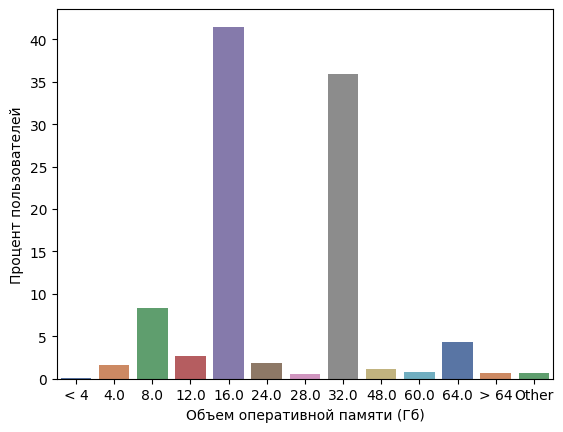

In [49]:
os = pd.read_csv('os.csv')
ram = pd.read_csv('systemRAM_statistics.csv')
ram['Percentage'] = ram['Percentage'].apply(lambda x: x.replace('%','')).astype(float)
ram['Memory Size'].iloc[1:11] = ram['Memory Size'].iloc[1:11].apply(lambda x: float(x[:-3]))
ram.at[0, 'Memory Size'] = '< 4'
ram.at[11, 'Memory Size'] = '> 64'
plt.xlabel('Объем оперативной памяти (Гб)')
plt.ylabel('Процент пользователей')
sns.barplot(data = ram, x = 'Memory Size', y = 'Percentage', palette = 'deep')

In [43]:
os['Percentage'] = os['Percentage'].apply(lambda x: x.replace('%','')).astype(float)
print(os[os['Operating System'].isin(['Windows 11 64 bit', 'Windows 10 64 bit'])]['Percentage'].sum(), '- % пользователей Windows 10 и 11')

94.71000000000001 - % пользователей Windows 10 и 11


In [20]:
cyrit = pd.read_csv('multiTimeline.csv')
cyrit['Категория: Все категории'] = pd.to_numeric(cyrit['Категория: Все категории'], errors='coerce')
print(cyrit['Категория: Все категории'].sum(), '- количество запросов в гугл "Can you run it"')

9661.0 - количество запросов в гугл "Can you run it"


In [23]:
req = pd.read_csv('output.csv')
req = req[['Memory:','CPU:']]
req = req.rename(columns={'Memory:': 'Memory'})
req = req.rename(columns={'CPU:': 'CPU'})
req_data = req.groupby("CPU").size().sort_values(ascending=False)
req_data = req_data.head(10)
top10 = req_data.index.to_list()
req = req[req['CPU'].isin(top10)]

([<matplotlib.patches.Wedge at 0x79ae14778620>,
 [Text(0.6264493482740002, 0.9041909168129707, ' 4 GB'),
  Text(-0.9401660151831928, 0.5710410352107428, ' 2 GB'),
  Text(-0.9471696489107413, -0.5593475271978086, ' 1 GB'),
  Text(-0.3660466278881258, -1.0373089540786449, ' 8 GB'),
  Text(0.14896223079609805, -1.0898670807929975, ' 512 MB'),
  Text(0.45018255925488077, -1.0036611297358915, '2 GB'),
  Text(0.6048758912043, -0.9187628400407822, '4 GB'),
  Text(0.7083327602311095, -0.8415846367320269, ' 256 MB'),
  Text(0.7917015962078521, -0.7636809429087119, '1 GB'),
  Text(0.8577911433891181, -0.6886177127573684, ' 6 GB'),
  Text(0.9031219693385932, -0.6279894175047709, ' 500 MB'),
  Text(0.9382503958499003, -0.5741830672246488, ' 128 MB'),
  Text(0.9693724724956709, -0.5199201953835126, ' 3 GB'),
  Text(0.9945533833916849, -0.46996124051261123, '512 MB'),
  Text(1.015204643808343, -0.42350859635900595, ' 4 MB'),
  Text(1.0315269221142882, -0.3820369209296708, ' 2 MB'),
  Text(1.04299466

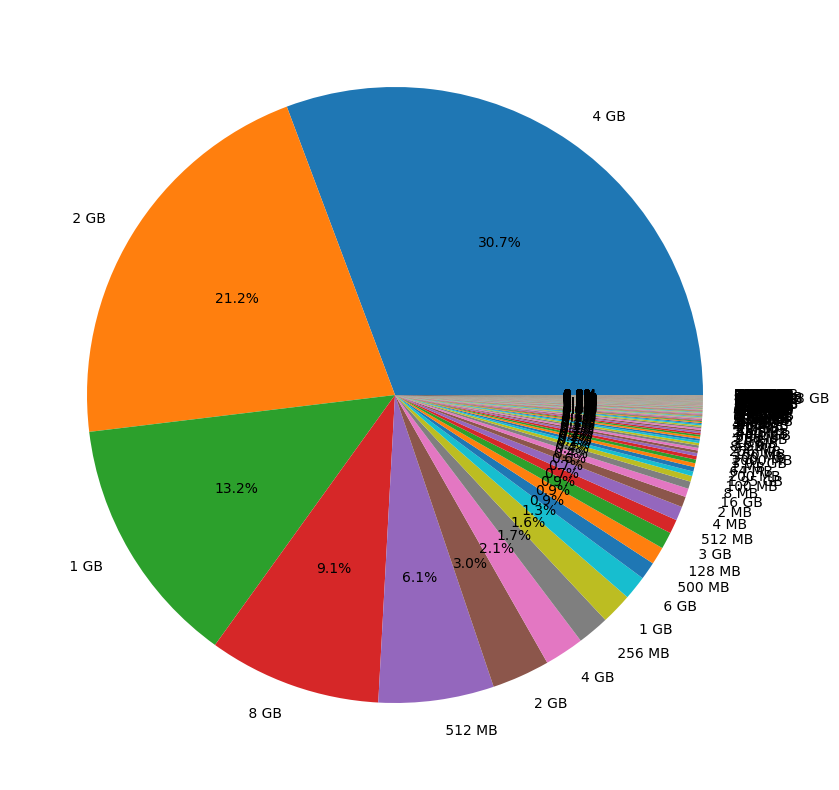

In [24]:
req_memory = req.groupby("Memory").size().sort_values(ascending=False)
plt.figure(figsize = (10, 10))
plt.pie(req_memory, labels = req_memory.index, autopct = '%1.1f%%')

In [25]:
f = [2,3,3,1.3,2.7,3.7,4,2,1.2,3] #вручную найденные частоты процессоров
req_data = req_data.to_frame()
req_data['Frequency (GHz)'] = f
req_data = req_data.reset_index()
req_data = req_data.rename(columns={0: 'Count'})
req_data = req_data.rename(columns={'CPU:': 'CPU'})
req_data

,CPU,Count,Frequency (GHz)
0,Intel Pentium 4 2.00GHz,12792,2.0
1,Intel Core 2 Duo Q6867,11177,3.0
2,Intel Core 2 Duo E8400,5704,3.0
3,Intel Core i3-2340UE,4391,1.3
4,Intel Core i5-4400E,4222,2.7
5,Intel Core i5-4590,3662,3.7
6,Intel Pentium 4 4.00GHz,2326,4.0
7,Intel Pentium 4 2.00GHz,2186,2.0
8,Intel Atom Z510,2154,1.2
9,Intel Core 2 Duo Q6867,2093,3.0


/tmp/ipython-input-2515846973.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = req_data, y = 'Count', x = 'Frequency (GHz)', estimator=np.sum, ci = None, palette = 'dark')
/tmp/ipython-input-2515846973.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = req_data, y = 'Count', x = 'Frequency (GHz)', estimator=np.sum, ci = None, palette = 'dark')


Text(0.5, 1.0, 'Распределение игр по минимально-требуемой частоте процессора')

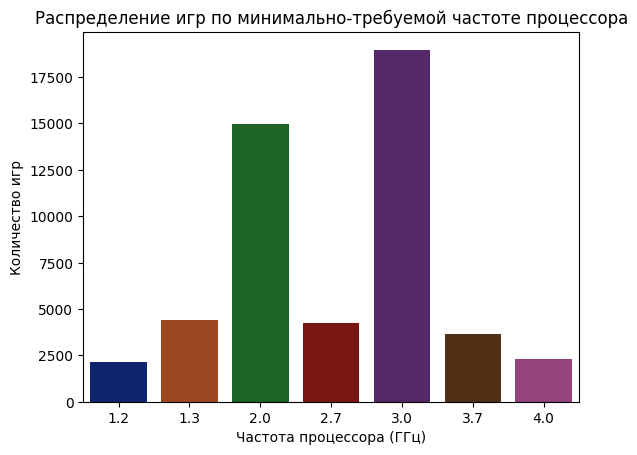

In [50]:
sns.barplot(data = req_data, y = 'Count', x = 'Frequency (GHz)', estimator=np.sum, ci = None, palette = 'dark')
plt.ylabel('Количество игр')
plt.xlabel('Частота процессора (ГГц)')
plt.title('Распределение игр по минимально-требуемой частоте процессора')

In [33]:
total = req_data['Count'].sum()
print(req_data[req_data['Frequency (GHz)'].isin([1.2, 1.3, 2, 2.7])]['Count'].sum()/total,'- до 3 ГГц')
print(req_data[req_data['Frequency (GHz)'].isin([3])]['Count'].sum()/total,'- 3 ГГц')
print(req_data[req_data['Frequency (GHz)'].isin([3.7, 4])]['Count'].sum()/total,'- больше 3 ГГц')

0.5077208274991618 - до 3 ГГц
0.37418896799258483 - 3 ГГц
0.1180902045082533 - больше 3 ГГц
